<a href="https://colab.research.google.com/github/wharshal11/AirBnB-Booking-Analysis/blob/main/Project_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale.




# First import all required Packages for EDA

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid",{'grid.linestyle': ''})
sns.set(rc={'figure.figsize':(16.7,8.27)})

# Load the Data for Analysis

In [57]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv')

# Dataset Inspection

In [70]:
# # First Look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [71]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))


# Dataset Information

In [ ]:
df.info()

In [ ]:
# Visualization of NaN Values with the help of HeatMap
sns.heatmap(df.isnull(),yticklabels= False,cbar = False , cmap='viridis')

By looking info of data and HeatMap. we can see number of things.

1.There are NaN value present in dataset.

2.Most number of NaN value present in last_review and 'review per_month' column

3.Dataset divided into numerical and catogorical datatype.

4.48895 rows and 16 colums

# Univariant analysis of Features

In [ ]:
airbnb_df_with_na = df.copy()

# Column 1-name; column 2-host_id; column 3-host_name



In [ ]:
# column 1 contain the name of the property which the host is giving on rent by which he can draw the customer's attention
print(f'There are total of {df.name.nunique()} unique property' )

In [ ]:
# column 2 contain Host ID
print(f'There are total of {df.host_id.nunique()} unique host ID' )

In [ ]:
# column 3 contain Host Name
print(f'There are total of {df.host_name.nunique()} unique host name' )

Observations



1.  Column 3 contains all the unique names of hosts. We observe in all 11452 different hosts names in this database. 
2.  By comparing the unique numbers of host and host ID it can be concluded that there are many hosts with the same name.
3. So we will use host id for all further analysis.

# Column 4-**neighbourhood_group**

In [ ]:
# Unique Neighbourhood
df.neighbourhood_group.unique()

There are total of 5 neighbour area.
By ploting the countplot we can see which neighbour area has most number of rooms.

In [ ]:
# Creating the Countplot
plt.figure(figsize=(12,8))
sns.countplot(df.neighbourhood_group, saturation=0.75)
plt.title('Number of apartments in each neighbourhood group')
plt.ylabel('No of properties')
plt.xlabel('Neighbourhood group')
plt.show()

we can see that **Manhatten** has most of the rooms followed by **Brooklyn** and **Queens**

# Column 5-**neighbourhood**

In [ ]:
print(f'There are total of {df.neighbourhood.nunique()} unique nieghbourhood' )

In [ ]:
#creating a count plot for top 20 neighbourhood
sns.countplot(df.neighbourhood, order = df.neighbourhood.value_counts().iloc[:20].index ).set_title('Top 20 neighbourhood with max no of rooms')
#rotating the x axis labels 
plt.xticks(rotation=30,ha='right')
#adding x and y labels to the plot
plt.ylabel('No of rooms')
plt.figure(figsize=(16.7,8.27)) 
plt.show()

In [ ]:
#storing the different neighbourhood to their respective neighbourhood_groups
Brooklyn_group=df.loc[df['neighbourhood_group']== 'Brooklyn']
Manhattan_group=df.loc[df['neighbourhood_group']== 'Manhattan']
Queens_group=df.loc[df['neighbourhood_group']== 'Queens']
Staten_Island_group=df.loc[df['neighbourhood_group']== 'Staten Island']
Bronx_group=df.loc[df['neighbourhood_group']== 'Bronx']

In [ ]:
# top 10 areas in Brooklyn with most booking
#creating a count plot
sns.countplot(y="neighbourhood", data=Brooklyn_group, palette="Greens_d",
              order=Brooklyn_group.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Brooklyn neighbourhood value count')
#adding x and y labels to the plot
plt.xlabel('No of rooms')

In [ ]:
# top 10 areas in Manhattan with most booking
#creating a count plot
sns.countplot(y="neighbourhood", data=Manhattan_group, palette="Greens_d",
              order=Manhattan_group.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Manhattan neighbourhood value count')
#adding x and y labels to the plot
plt.xlabel('No of rooms')

In [ ]:
# top 10 areas in Queens with most booking
#creating a count plot

sns.countplot(y="neighbourhood", data=Queens_group, palette="Greens_d",
              order=Queens_group.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Queens neighbourhood value count')
#adding x and y labels to the plot
plt.xlabel('No of rooms')

In [ ]:
# top 10 areas in Staten_Island with most booking
#creating a count plot

sns.countplot(y="neighbourhood", data=Staten_Island_group, palette="Greens_d",
              order=Staten_Island_group.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Staten_Island neighbourhood value count')

#adding x and y labels to the plot
plt.xlabel('No of rooms')

In [ ]:
# top 10 areas in Staten_Island with most booking
#creating a count plot
sns.countplot(y="neighbourhood", data=Bronx_group, palette="Greens_d",
              order=Bronx_group.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Bronx neighbourhood value count')

#adding x and y labels to the plot
plt.xlabel('No of rooms')             

In [ ]:
# creating subplots to plot all the graphs together 
fig, axes = plt.subplots(3,2, figsize=(30, 20))
sns.countplot(ax=axes[0,0],y="neighbourhood", data=Brooklyn_group, palette="PuBuGn",
              order=Brooklyn_group.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 brooklyn neighbourhood value count')
              
sns.countplot(ax=axes[0,1],y="neighbourhood", data=Manhattan_group, palette="Blues",
              order=Manhattan_group.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 manhattan neighbourhood value count')

sns.countplot(ax=axes[1,0],y="neighbourhood", data=Queens_group, palette="Greens_d",
              order=Queens_group.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Queens neighbourhood value count')

sns.countplot(ax=axes[1,1],y="neighbourhood", data=Staten_Island_group, palette="BrBG",
              order=Staten_Island_group.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Staten_Island neighbourhood value count')

sns.countplot(ax=axes[2,0],y="neighbourhood", data=Bronx_group, palette="BuPu",
              order=Bronx_group.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Bronx neighbourhood value count')

Observations
1. willamsburg, bedford and bushwick have most no of bookings in brooklyn neighbourhood_group
2. Harlem, Upper West Side and Hell's Kitchen have most no of bookings in manhattan neighbourhood_group
3. astoria, flushing and long island city  have most no of bookings in Queens neighbourhood_group
4. tompkinsville, St.George, cancaord ave most no of bookings in Staten_Island neighbourhood_group
5. in bronx neighbourhood_group all the neighbourhood have almost equal no of bookings

# Column 6-**Latitude** & Column 7-**Longitude**

In [ ]:
df.latitude.describe()

In [ ]:
df.longitude.describe()

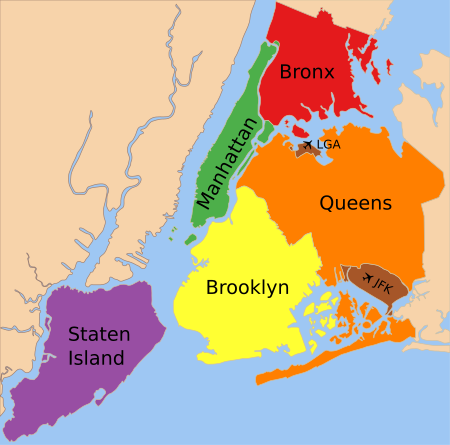

In [ ]:
# Pointing the latitude and longitude on graph through scattering plot
plt.figure(figsize=(10,8))
sns.scatterplot(df.latitude,df.longitude, hue='neighbourhood_group', data=df)

In [ ]:
# Importing image of Map 
import urllib
# setting  figure size
plt.figure(figsize=(10,8))
# setting  background map image in graph
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
image=plt.imread(img)
plt.imshow(image,zorder=0,extent=[-74.258, -73.7, 40.488, 40.92])
sns.scatterplot(data = df,x='longitude',y='latitude',hue='neighbourhood_group').set_title('Density of rooms')

# Column 8-room type


In [ ]:
# Number of room type provided by the hosts
sns.countplot(df.room_type)

In [ ]:
print(df.room_type.value_counts())

In [ ]:
# creating subplots to plot all the graphs together for properties booked in different neighbourhood groups
fig, axes = plt.subplots(3,2, figsize=(30, 20))
sns.countplot(ax=axes[0,0],x="room_type", data=Brooklyn_group, palette="PuBuGn",
              order=Brooklyn_group.room_type.value_counts().iloc[:3].index).set_title('Property booked in brooklyn neighbourhood')
              
sns.countplot(ax=axes[0,1],x="room_type", data=Manhattan_group, palette="Blues",
              order=Manhattan_group.room_type.value_counts().iloc[:3].index).set_title('Property booked in manhattan neighbourhood')

sns.countplot(ax=axes[1,0],x="room_type", data=Queens_group, palette="Greens_d",
              order=Queens_group.room_type.value_counts().iloc[:3].index).set_title('Property booked in Queens neighbourhood')

sns.countplot(ax=axes[1,1],x="room_type", data=Staten_Island_group, palette="BrBG",
              order=Staten_Island_group.room_type.value_counts().iloc[:3].index).set_title('Property booked in Staten_Island')

sns.countplot(ax=axes[2,0],x="room_type", data=Bronx_group, palette="BuPu",
              order=Bronx_group.room_type.value_counts().iloc[:3].index).set_title('Property booked in Bronx neighbourhood')

## From the above graphs we can see that;
There are 3 types of room provided by the host in 5 neighbourhood group. 


Entire home/apt = 25409

Private room    = 22326

Shared room     = 1160

In Brooklyn and Staten_Island neighbourhood group customer prefer both private room and entire home/apt over shared rooms.

Whereas the Private rooms booked in Queens and Bronx neighbourhood group is higher than the Entire home/apt room type.

And in Manhattan neighbourhood group most of the customer prefer Entire home/apt over Private rooms.

In all the 5 neighbourhood group, Shared rooms have very low weighted.

# Column 9-**price**

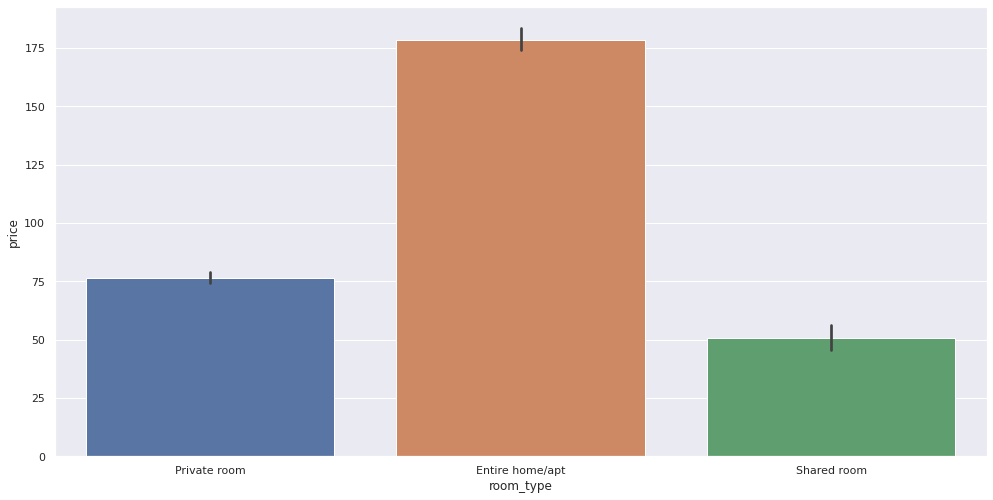

In [65]:
sns.barplot(x='room_type',y='price',data=Brooklyn_group)

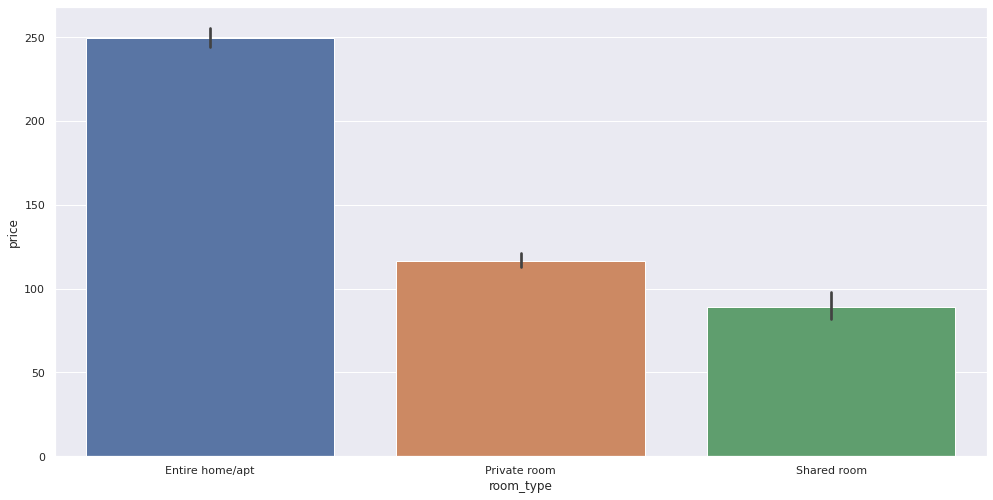

In [66]:
sns.barplot(x='room_type',y='price',data=Manhattan_group)

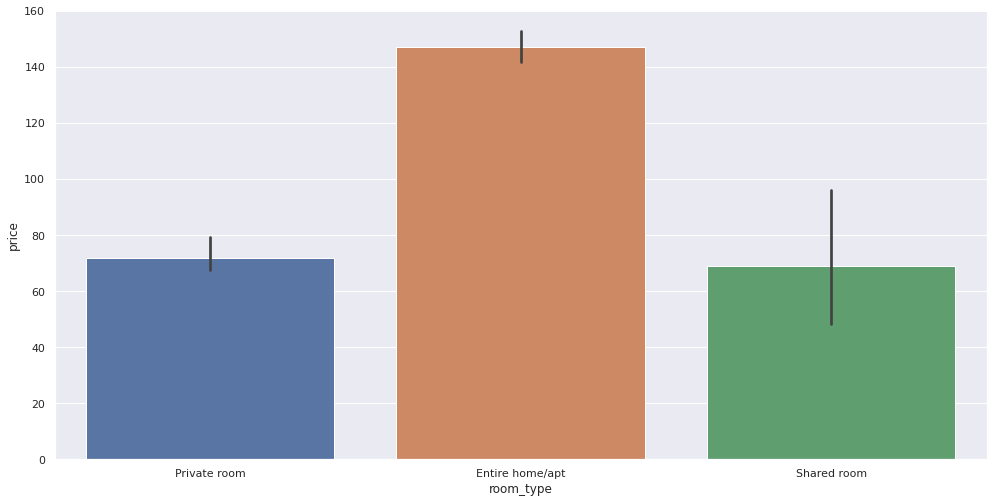

In [67]:
sns.barplot(x='room_type',y='price',data=Queens_group)

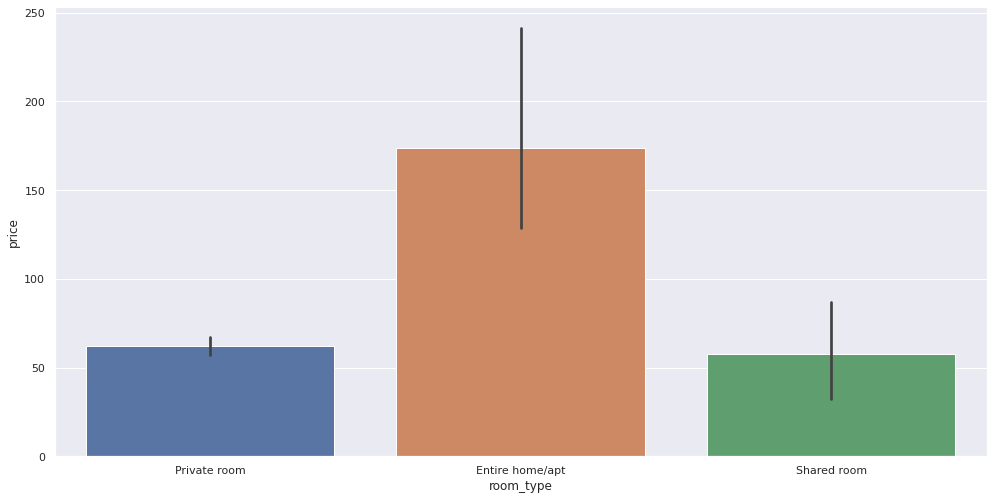

In [68]:
sns.barplot(x='room_type',y='price',data=Staten_Island_group)

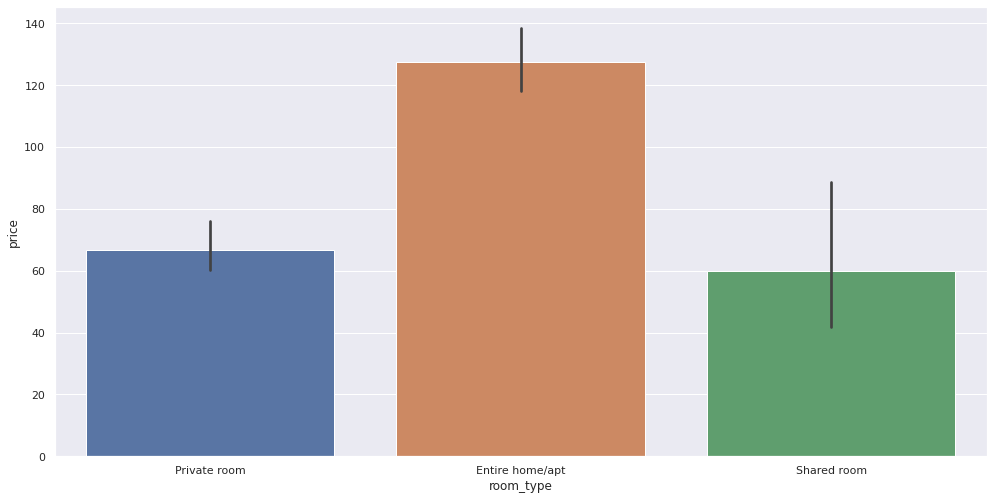

In [74]:
sns.barplot(x='room_type',y='price',data=Bronx_group)